In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pandas_profiling import ProfileReport

In [2]:
%cd ..
%cd data/raw

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\data\raw


In [3]:
df = pd.read_csv('1.1 Processed Data.csv')
df = df.drop(['owner_no.1', 'order_dt.1'], axis=1)

In [4]:
%cd ..\..

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions


In [5]:
%cd reports

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\reports


In [ ]:
report1 = ProfileReport(df).to_file("Raw Data Profile - Pandas Profiling.html")

In [6]:
%cd figures

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\reports\figures


In [ ]:
sns.pairplot(df, height=2, aspect=1)
plt.savefig("Raw Data - Seaborn Pairplot.png")
plt.show()

In [9]:
df.dtypes

owner_no                                       int64
order_dt                              datetime64[ns]
tot_ticket_paid_amt                          float64
tot_contribution_paid_amt                    float64
first_order_dt                        datetime64[ns]
first_cont_dt                         datetime64[ns]
geo_area_desc                                  int64
Prelim Capacity                                int64
ltv_tkt_value                                float64
Lifetime Giving                              float64
prospect_board                                 int64
days_to_donation                               int64
first_cont_order                               int64
first_cont_after                               int64
rolling_tkt_sum                              float64
channel_desc_3rd Party                         int64
channel_desc_At the Performance                int64
channel_desc_Chat                              int64
channel_desc_Default Channel                  

In [8]:
#Create datetime data types
df.order_dt=pd.to_datetime(df.order_dt, errors='coerce')
df.first_order_dt = pd.to_datetime(df.first_order_dt, errors='coerce')
df.first_cont_dt = pd.to_datetime(df.first_cont_dt, errors='coerce')

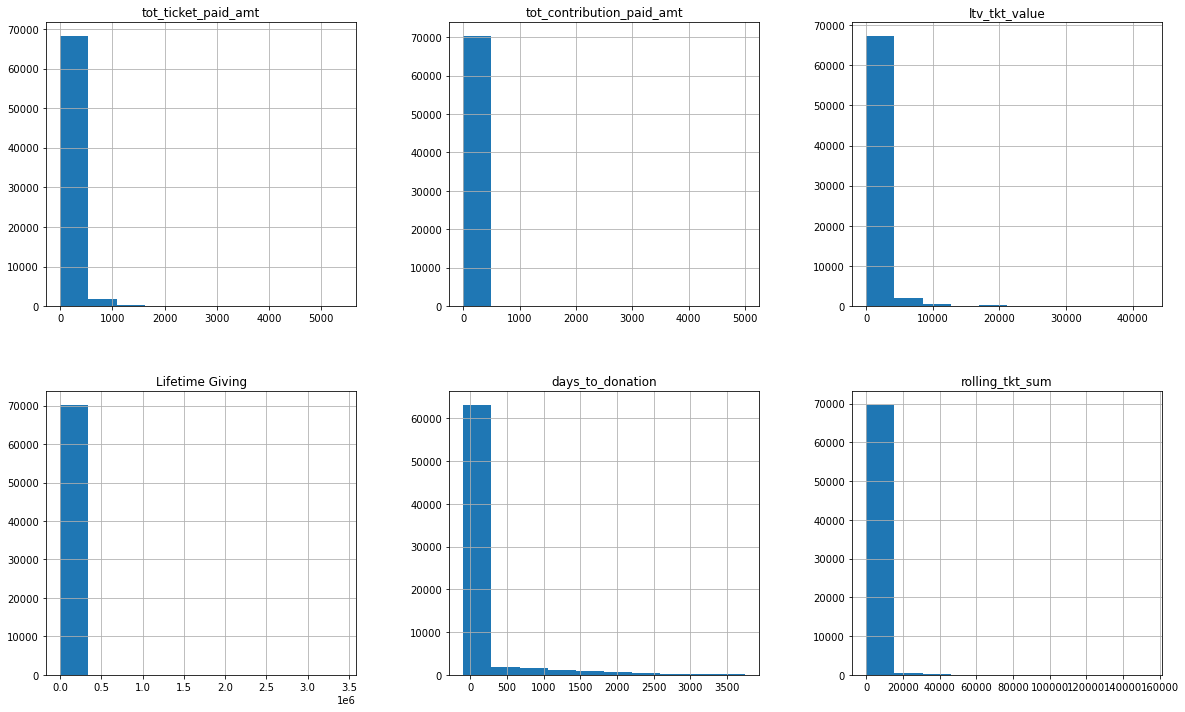

In [10]:
num_cols = [
    'tot_ticket_paid_amt',
    'tot_contribution_paid_amt',
    'ltv_tkt_value',
    'Lifetime Giving',
    'days_to_donation',
    'rolling_tkt_sum'
]
fig = df[num_cols].hist(layout = (2,3), figsize = (20,12))
plt.savefig('Histograms of Numerical Data.png')
plt.show()

In [11]:
for col in num_cols:
    print(col, df[col].max(), df[col].quantile(.99),df[col].quantile(.98), df[col].quantile(.97), df[col].quantile(.96))

tot_ticket_paid_amt 5400.0 898.0 645.0 540.0 480.0
tot_contribution_paid_amt 5000.0 40.0 10.0 0.0 0.0
ltv_tkt_value 42312.0 10168.6 7139.0 5434.0 4501.05
Lifetime Giving 3417602.0 12858.0 2302.0 1113.24 649.1600000000035
days_to_donation 3747 2503.0 1985.0 1635.0 1369.0
rolling_tkt_sum 153692.0 14481.569999999789 8468.640000000014 5729.674999999988 3988.1600000000035


In [15]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
for col in num_cols:
    new_col = df[col].values.reshape(-1,1)
    df[col] = scaler.fit_transform(new_col)

In [16]:
df.head()

,owner_no,order_dt,tot_ticket_paid_amt,tot_contribution_paid_amt,first_order_dt,first_cont_dt,geo_area_desc,Prelim Capacity,ltv_tkt_value,Lifetime Giving,...,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
0,111,2015-10-07,0.753149,0.0,2015-10-07,1900-01-01,1,5,0.404851,0.0,...,0,0,0,1,1,0,0,0,0,0
1,111,2016-09-16,0.880801,0.0,2015-10-07,1900-01-01,1,5,0.404851,0.0,...,0,0,0,1,1,0,0,0,0,0
2,111,2018-09-21,0.319131,0.0,2015-10-07,1900-01-01,1,5,0.404851,0.0,...,0,0,0,1,1,0,0,0,0,0
3,258,2014-09-28,0.951010,0.0,2014-09-28,1900-01-01,5,6,0.037313,0.0,...,0,0,0,1,1,0,0,0,0,0
4,262,2014-10-02,0.159565,0.0,2014-10-02,1900-01-01,2,4,-0.110075,0.0,...,0,0,0,1,1,0,0,0,0,0


In [17]:
cd ..\..

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions


In [18]:
%cd data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\data\processed


In [19]:
df.to_csv('2.0 Processed Data with Scaled Quantitative Values.csv')

In [24]:
df.columns

Index(['owner_no', 'order_dt', 'tot_ticket_paid_amt',
       'tot_contribution_paid_amt', 'first_order_dt', 'first_cont_dt',
       'geo_area_desc', 'Prelim Capacity', 'ltv_tkt_value', 'Lifetime Giving',
       'prospect_board', 'days_to_donation', 'first_cont_order',
       'first_cont_after', 'rolling_tkt_sum', 'channel_desc_3rd Party',
       'channel_desc_At the Performance', 'channel_desc_Chat',
       'channel_desc_Default Channel', 'channel_desc_Email',
       'channel_desc_Fax', 'channel_desc_Internal Request',
       'channel_desc_Mail', 'channel_desc_Mobile', 'channel_desc_Online',
       'channel_desc_Phone', 'channel_desc_Telefunding',
       'channel_desc_Walk Up', 'MOS_desc_External', 'MOS_desc_Internal',
       'MOS_desc_Ticketing', 'delivery_desc_Digital',
       'delivery_desc_Do Not Print Tickets', 'delivery_desc_Mail',
       'delivery_desc_Will Call', 'facility_desc_Academy of Music',
       'facility_desc_Fundraiser', 'facility_desc_Independence Mall',
       'faci

In [26]:
%cd ..\..
%cd reports

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\reports


In [27]:
report2 = ProfileReport(df).to_file("Processed Data Profile - Pandas Profiling.html")